## Основы работы с numpy

In [1]:
import pandas as pd

In [2]:
import numpy as np

1. Загрузите данные в ноутбук

In [3]:
# я использовала 1 вариант

In [4]:
df = pd.read_excel('к лабораторной 0.1/Вариант 1.xlsx', header=2)

In [5]:
df = df[:-1]
df.tail()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
3043,3044.0,146.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0
3044,3045.0,147.0,11,Ж,340.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0
3045,3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0
3046,3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0
3047,3048.0,144.0,11А,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0


2. Сделайте описательную статистику по набранному баллу

In [6]:
# при помощи pandas
df['Балл'].describe()

count    3048.000000
mean       72.769029
std        13.664908
min        20.000000
25%        64.000000
50%        72.000000
75%        82.000000
max       100.000000
Name: Балл, dtype: float64

In [7]:
# при помощи numpy
grades = np.array(df['Балл'])

In [8]:
# для нахождения моды
def find_mode(row):
    vals,counts = np.unique(row, return_counts=True)
    index = np.argmax(counts)
    return vals[index]

In [9]:
print('count: ', grades.shape[0])
print('sum: ', grades.sum())
print('mean: ', grades.mean())
print('median: ', np.median(grades))
print('mode: ', find_mode(grades))
print('std: ', grades.std())
print('min: ', grades.min())
print('quantile 0.25: ', np.quantile(grades, 0.25))
print('quantile 0.5: ', np.quantile(grades, 0.5))
print('quantile 0.75: ', np.quantile(grades, 0.75))
print('max: ', grades.max())

count:  3048
sum:  221800.0
mean:  72.76902887139107
median:  72.0
mode:  80.0
std:  13.662665812887763
min:  20.0
quantile 0.25:  64.0
quantile 0.5:  72.0
quantile 0.75:  82.0
max:  100.0


3. Найдите процент учащихся, выполнивших работу ниже среднего

In [10]:
print(f'{grades[grades < grades.mean()].shape[0] / grades.shape[0] * 100:.2f}%')

51.28%


4. Найти процент учащихся не сдавших экзамен

In [11]:
min_grade = df['Минимальный балл']
min_grade = np.unique(min_grade)
min_grade # минимальный балл везде одинаковый (что логично)

array([24.])

In [12]:
min_grade = min_grade[0] 
print(f'{grades[grades < min_grade].shape[0] / grades.shape[0] * 100:.2f}%')

0.13%


5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

In [13]:
from matplotlib import pyplot as plt 

([<matplotlib.patches.Wedge at 0x7f7ee3bdfd60>,
 [Text(-1.0999906515779159, 0.004535023835942995, 'passed'),
  Text(1.0999906518698257, -0.00453495303130981, 'failed')])

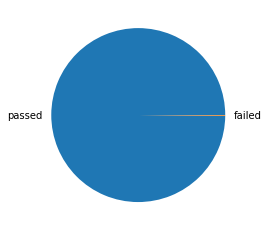

In [14]:
vals = [grades[grades >= min_grade].shape[0] , grades[grades < min_grade].shape[0] ]
labels = ["passed", "failed"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels)

In [15]:
# passed
grades[grades >= min_grade].shape[0]

3044

In [16]:
# failed
grades[grades < min_grade].shape[0]

4

6. Постройте ядерную оценку плотности распределению баллов за экзамен

In [17]:
# есть вопросы, не уверена, что правильно сделала, тк не совсем понятно само задание
# впрочем, у всей группы были вопросы к этому пункту
# вы сказали, что объясните это позже

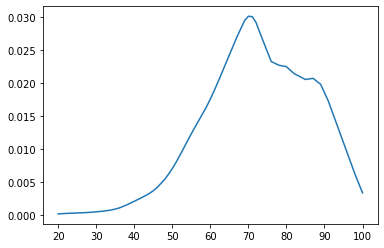

In [18]:
#v1
import numpy as np
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(grades.reshape(-1, 1))
kde_est = np.exp(kde.score_samples(grades.reshape(-1, 1)))

plt.plot(grades, kde_est)

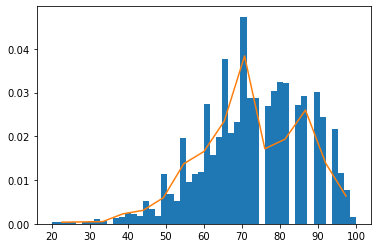

In [19]:
#v2
plt.hist(grades, bins=50, density=1)       
(n, bins) = np.histogram(grades, bins=15, density=True)
plt.plot(.5*(bins[1:]+bins[:-1]), n)

In [20]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Density'>

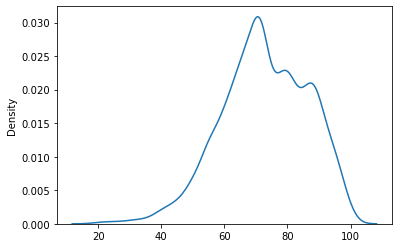

In [21]:
#v3
sns.kdeplot(grades)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

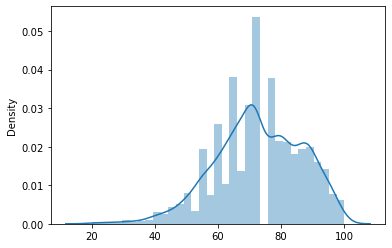

In [22]:
#v4
sns.distplot(grades)

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [23]:
A = 80 
B = 65 
C = 24
print(f'отлично: {np.count_nonzero(grades[grades >= A]) / np.count_nonzero(grades) * 100:.2f}%')
print(f'хорошо: {np.count_nonzero(grades[(grades >= B) & (grades < A)]) / np.count_nonzero(grades) * 100:.2f}%')
print(f'удовлетворительно: {np.count_nonzero(grades[(grades >= C)  & (grades < B)]) / np.count_nonzero(grades) * 100:.2f}%')
print(f'неудовлетворительно: {np.count_nonzero(grades[grades < C]) / np.count_nonzero(grades) * 100:.2f}%')

отлично: 34.97%
хорошо: 38.98%
удовлетворительно: 25.92%
неудовлетворительно: 0.13%


8. Какое процентное соотношение юношей и девушек писало данный экзамен?


In [24]:
sex = np.array(df['Пол'])
vals, counts = np.unique(sex, return_counts=True)
print(f'{vals[0]}: {(counts[0] / counts.sum())*100:.2f}% \n{vals[1]}: {(counts[1] / counts.sum()) * 100 :.2f}%')

Ж: 57.97% 
М: 42.03%


9. Сколько школ принимало участие в экзамене?

In [25]:
school = np.array(df['№ школы'])
np.count_nonzero(np.unique(school))

24

## Дополнительные задания


In [26]:
df.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0
1,2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0
2,3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.0,24.0
3,4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9.0,22.0,24.0
4,5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10.0,24.0,24.0


1. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [27]:
brief = np.array(df['Задания с кратким ответом'])
expanded = np.array(df['Задания с развёрнутым ответом'])

In [28]:
def func_B(string):
    new_str = string.replace('+', '1').replace('-', '0')
    return list(new_str)

In [29]:
B = np.array(list(map(func_B, brief))).astype(int)
B

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [2, 0, 0, ..., 0, 0, 1],
       ...,
       [2, 1, 1, ..., 1, 1, 4],
       [2, 1, 1, ..., 1, 1, 4],
       [2, 1, 1, ..., 1, 1, 4]])

In [30]:
import re

def func_C(string):
    result = re.sub(r"\(\d\)", "", string)
    return list(result)

In [31]:
C = np.array(list(map(func_C, expanded))).astype(int)
C

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 3, 1, ..., 2, 1, 1],
       [1, 3, 1, ..., 2, 1, 1],
       [1, 3, 1, ..., 2, 1, 1]])

In [32]:
B[0].shape[0] # Задания с кратким ответом

25

In [33]:
C[0].shape[0] # Задания с развернутым ответом

12

2. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В 1 … В к Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.


In [34]:
# v1
# если учитывать, что выполненные задания c множественным ответом - это задания, за которые получен макс. балл 

In [35]:
# мы видим, что в последней записи результат за экзамен максимальный, значит за эталон берем его
benchmark = B[-1]
benchmark

array([2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4])

In [36]:
def result(array, benchmark):
    lst = np.array([array[array[:,i] == benchmark[i]].shape[0] / array.shape[0] for i in range(benchmark.shape[0])])
    return np.c_[np.arange(1, benchmark.shape[0]+1).reshape(-1,1), lst.reshape(-1,1)] 

In [37]:
resultB1 = result(B, benchmark)
for v in resultB1:
    print(f'B{v[0]:.0f} - выполнено {v[1]*100:.2f}%, не выполнено {(1 - v[1])*100:.2f}%')

B1 - выполнено 81.69%, не выполнено 18.31%
B2 - выполнено 92.88%, не выполнено 7.12%
B3 - выполнено 87.34%, не выполнено 12.66%
B4 - выполнено 77.30%, не выполнено 22.70%
B5 - выполнено 58.96%, не выполнено 41.04%
B6 - выполнено 90.62%, не выполнено 9.38%
B7 - выполнено 50.66%, не выполнено 49.34%
B8 - выполнено 75.59%, не выполнено 24.41%
B9 - выполнено 84.12%, не выполнено 15.88%
B10 - выполнено 96.88%, не выполнено 3.12%
B11 - выполнено 93.18%, не выполнено 6.82%
B12 - выполнено 75.52%, не выполнено 24.48%
B13 - выполнено 83.14%, не выполнено 16.86%
B14 - выполнено 70.18%, не выполнено 29.82%
B15 - выполнено 76.41%, не выполнено 23.59%
B16 - выполнено 68.96%, не выполнено 31.04%
B17 - выполнено 67.22%, не выполнено 32.78%
B18 - выполнено 74.18%, не выполнено 25.82%
B19 - выполнено 69.36%, не выполнено 30.64%
B20 - выполнено 82.74%, не выполнено 17.26%
B21 - выполнено 71.85%, не выполнено 28.15%
B22 - выполнено 48.06%, не выполнено 51.94%
B23 - выполнено 76.54%, не выполнено 23.46%
B

In [38]:
# v2
# если учитывать, что любое НЕвыполненное задание - это 0 баллов

In [39]:
def result_v2(array, benchmark):
    lst = np.array([array[array[:,i] != 0].shape[0] / array.shape[0] for i in range(benchmark.shape[0])])
    return np.c_[ np.arange(1, benchmark.shape[0]+1).reshape(-1,1), lst.reshape(-1,1)] 

In [40]:
resultB2 = result_v2(B, benchmark)
for v in resultB2:
    print(f'B{v[0]:.0f} - выполнено {v[1]*100:.2f}%, не выполнено {(1 - v[1])*100:.2f}%')

B1 - выполнено 98.69%, не выполнено 1.31%
B2 - выполнено 92.88%, не выполнено 7.12%
B3 - выполнено 87.34%, не выполнено 12.66%
B4 - выполнено 77.30%, не выполнено 22.70%
B5 - выполнено 58.96%, не выполнено 41.04%
B6 - выполнено 90.62%, не выполнено 9.38%
B7 - выполнено 95.05%, не выполнено 4.95%
B8 - выполнено 75.59%, не выполнено 24.41%
B9 - выполнено 84.12%, не выполнено 15.88%
B10 - выполнено 96.88%, не выполнено 3.12%
B11 - выполнено 93.18%, не выполнено 6.82%
B12 - выполнено 75.52%, не выполнено 24.48%
B13 - выполнено 83.14%, не выполнено 16.86%
B14 - выполнено 70.18%, не выполнено 29.82%
B15 - выполнено 97.60%, не выполнено 2.40%
B16 - выполнено 68.96%, не выполнено 31.04%
B17 - выполнено 67.22%, не выполнено 32.78%
B18 - выполнено 74.18%, не выполнено 25.82%
B19 - выполнено 69.36%, не выполнено 30.64%
B20 - выполнено 82.74%, не выполнено 17.26%
B21 - выполнено 71.85%, не выполнено 28.15%
B22 - выполнено 48.06%, не выполнено 51.94%
B23 - выполнено 76.54%, не выполнено 23.46%
B24 

3. Аналогично и с типом С (ответы с развернутым ответом)

In [41]:
# аналогично
# v1
# если учитывать, что выполненные задания - это задания, за которые получен макс. балл 

In [42]:
# мы видим, что в последней записи результат за экзамен максимальный, значит за эталон берем его

In [43]:
benchmark_C = C[-1]
benchmark_C

array([1, 3, 1, 3, 2, 2, 3, 3, 2, 2, 1, 1])

In [44]:
resultC1 = result(C, benchmark_C)
for v in resultC1:
    print(f'C{v[0]:.0f} - выполнено {v[1]*100:.2f}%, не выполнено {(1 - v[1])*100:.2f}%')

C1 - выполнено 96.75%, не выполнено 3.25%
C2 - выполнено 47.51%, не выполнено 52.49%
C3 - выполнено 94.46%, не выполнено 5.54%
C4 - выполнено 61.35%, не выполнено 38.65%
C5 - выполнено 67.29%, не выполнено 32.71%
C6 - выполнено 25.69%, не выполнено 74.31%
C7 - выполнено 41.34%, не выполнено 58.66%
C8 - выполнено 22.90%, не выполнено 77.10%
C9 - выполнено 32.05%, не выполнено 67.95%
C10 - выполнено 22.28%, не выполнено 77.72%
C11 - выполнено 98.00%, не выполнено 2.00%
C12 - выполнено 84.55%, не выполнено 15.45%


In [45]:
# v2
# если учитывать, что любое НЕвыполненное задание - это с 0 баллов

In [46]:
resultC2 = result_v2(C, benchmark_C)
for v in resultC2:
    print(f'C{v[0]:.0f} - выполнено {v[1]*100:.2f}%, не выполнено {(1 - v[1])*100:.2f}%')

C1 - выполнено 96.75%, не выполнено 3.25%
C2 - выполнено 94.72%, не выполнено 5.28%
C3 - выполнено 94.46%, не выполнено 5.54%
C4 - выполнено 94.26%, не выполнено 5.74%
C5 - выполнено 96.46%, не выполнено 3.54%
C6 - выполнено 97.44%, не выполнено 2.56%
C7 - выполнено 92.39%, не выполнено 7.61%
C8 - выполнено 81.50%, не выполнено 18.50%
C9 - выполнено 84.19%, не выполнено 15.81%
C10 - выполнено 81.73%, не выполнено 18.27%
C11 - выполнено 98.00%, не выполнено 2.00%
C12 - выполнено 84.55%, не выполнено 15.45%


4. Сделайте анализ по двум школам:
    - по всем выполненным заданиям типа В
    - по заданиям типа С больше 50%
    - по среднему баллу юношей и девушек

In [47]:
alls = np.array(df)

In [48]:
# возьмем номера школ, равные первым двум строкам записи 
school_num_1 = alls[0,1] #117
school_num_2 = alls[1,1] #148

In [49]:
school_1_slice = alls[alls[:,1] == school_num_1]
school_2_slice = alls[alls[:,1] == school_num_2]

In [50]:
school_1_slice.shape

(95, 11)

In [51]:
school_2_slice.shape

(325, 11)

In [52]:
# ШКОЛА 1

In [77]:
B_school1 = np.array(list(map(func_B, school_1_slice[:,5]))).astype(int)

In [54]:
# benchmark остается тот же
# v1
# если учитывать, что выполненные задания c множественным ответом - это задания, за которые получен макс. балл
result_B_school1 = result(B_school1, benchmark)
for v in result_B_school1:
    print(f'B{v[0]:.0f} - выполнено {v[1]*100:.2f}%')

B1 - выполнено 77.89%
B2 - выполнено 88.42%
B3 - выполнено 84.21%
B4 - выполнено 84.21%
B5 - выполнено 58.95%
B6 - выполнено 91.58%
B7 - выполнено 46.32%
B8 - выполнено 77.89%
B9 - выполнено 81.05%
B10 - выполнено 97.89%
B11 - выполнено 94.74%
B12 - выполнено 67.37%
B13 - выполнено 77.89%
B14 - выполнено 65.26%
B15 - выполнено 72.63%
B16 - выполнено 73.68%
B17 - выполнено 74.74%
B18 - выполнено 73.68%
B19 - выполнено 71.58%
B20 - выполнено 85.26%
B21 - выполнено 61.05%
B22 - выполнено 49.47%
B23 - выполнено 72.63%
B24 - выполнено 25.26%
B25 - выполнено 63.16%


In [78]:
C_school1 = np.array(list(map(func_C, school_1_slice[:,6]))).astype(int)

In [56]:
print(f'школа {school_num_1:.0f}\n')
# benchmark остается тот же
result_C_school1 = result(C_school1, benchmark_C)
for v in result_C_school1[result_C_school1[:,1] >= 0.5]:
    print(f'C{v[0]} - выполнено {v[1]*100:.2f}%')

школа 117

C1.0 - выполнено 93.68%
C3.0 - выполнено 91.58%
C4.0 - выполнено 52.63%
C5.0 - выполнено 65.26%
C11.0 - выполнено 95.79%
C12.0 - выполнено 84.21%


In [57]:
# v2
# если учитывать, что любое НЕвыполненное задание - это с 0 баллов
print(f'школа {school_num_1:.0f}\n')
result_B1_school1 = result_v2(B_school1, benchmark)
for v in result_B1_school1:
    print(f'B{v[0]:.0f} - выполнено {v[1]*100:.2f}%')

школа 117

B1 - выполнено 95.79%
B2 - выполнено 88.42%
B3 - выполнено 84.21%
B4 - выполнено 84.21%
B5 - выполнено 58.95%
B6 - выполнено 91.58%
B7 - выполнено 96.84%
B8 - выполнено 77.89%
B9 - выполнено 81.05%
B10 - выполнено 97.89%
B11 - выполнено 94.74%
B12 - выполнено 67.37%
B13 - выполнено 77.89%
B14 - выполнено 65.26%
B15 - выполнено 94.74%
B16 - выполнено 73.68%
B17 - выполнено 74.74%
B18 - выполнено 73.68%
B19 - выполнено 71.58%
B20 - выполнено 85.26%
B21 - выполнено 61.05%
B22 - выполнено 49.47%
B23 - выполнено 72.63%
B24 - выполнено 25.26%
B25 - выполнено 93.68%


In [58]:
print(f'школа {school_num_1:.0f}\n')
# benchmark остается тот же
result_C1_school1 = result_v2(C_school1, benchmark_C)
for v in result_C1_school1[result_C1_school1[:,1] >= 0.5]:
    print(f'C{v[0]} - выполнено {v[1]*100:.2f}%')

школа 117

C1.0 - выполнено 93.68%
C2.0 - выполнено 93.68%
C3.0 - выполнено 91.58%
C4.0 - выполнено 89.47%
C5.0 - выполнено 92.63%
C6.0 - выполнено 94.74%
C7.0 - выполнено 89.47%
C8.0 - выполнено 74.74%
C9.0 - выполнено 75.79%
C10.0 - выполнено 76.84%
C11.0 - выполнено 95.79%
C12.0 - выполнено 84.21%


In [59]:
male1 = school_1_slice[school_1_slice[:,3] == 'М'][:,-2].mean() 
female1 = school_1_slice[school_1_slice[:,3] == 'Ж'][:,-2].mean() 
print(f'средний балл М - {male1:.2f}')
print(f'средний балл Ж - {female1:.2f}')

средний балл М - 65.02
средний балл Ж - 75.69


In [60]:
# и для другой школы
# ШКОЛА 2

In [61]:
B_school2 = np.array(list(map(func_B, school_2_slice[:,5]))).astype(int)

In [62]:
# v1
# если учитывать, что выполненные задания c множественным ответом - это задания, за которые получен макс. балл
# benchmark остается тот же
print(f'школа {school_num_2:.0f}\n')
result_B_school2 = result(B_school2, benchmark)
for v in result_B_school2:
    print(f'B{v[0]:.0f} - выполнено {v[1]*100:.2f}%')

школа 148

B1 - выполнено 80.00%
B2 - выполнено 96.31%
B3 - выполнено 88.31%
B4 - выполнено 78.77%
B5 - выполнено 60.00%
B6 - выполнено 94.15%
B7 - выполнено 44.92%
B8 - выполнено 76.62%
B9 - выполнено 88.92%
B10 - выполнено 96.92%
B11 - выполнено 91.69%
B12 - выполнено 80.00%
B13 - выполнено 81.23%
B14 - выполнено 70.46%
B15 - выполнено 73.54%
B16 - выполнено 70.46%
B17 - выполнено 65.54%
B18 - выполнено 76.62%
B19 - выполнено 62.77%
B20 - выполнено 81.85%
B21 - выполнено 71.38%
B22 - выполнено 51.38%
B23 - выполнено 74.77%
B24 - выполнено 23.38%
B25 - выполнено 56.31%


In [63]:
C_school2 = np.array(list(map(func_C, school_2_slice[:,6]))).astype(int)

In [64]:
print(f'школа {school_num_2:.0f}\n')
# benchmark остается тот же
result_C_school2 = result(C_school2, benchmark_C)
for v in result_C_school2[result_C_school2[:,1] >= 0.5]:
    print(f'C{v[0]} - выполнено {v[1]*100:.2f}%')

школа 148

C1.0 - выполнено 94.77%
C3.0 - выполнено 92.92%
C4.0 - выполнено 59.38%
C5.0 - выполнено 66.46%
C11.0 - выполнено 96.92%
C12.0 - выполнено 87.69%


In [65]:
# v2
# если учитывать, что любое НЕвыполненное задание - это с 0 баллов
print(f'школа {school_num_2:.0f}\n')
result_B1_school2 = result_v2(B_school2, benchmark)
for v in result_B1_school2:
    print(f'B{v[0]:.0f} - выполнено {v[1]*100:.2f}%')

школа 148

B1 - выполнено 98.77%
B2 - выполнено 96.31%
B3 - выполнено 88.31%
B4 - выполнено 78.77%
B5 - выполнено 60.00%
B6 - выполнено 94.15%
B7 - выполнено 92.92%
B8 - выполнено 76.62%
B9 - выполнено 88.92%
B10 - выполнено 96.92%
B11 - выполнено 91.69%
B12 - выполнено 80.00%
B13 - выполнено 81.23%
B14 - выполнено 70.46%
B15 - выполнено 97.54%
B16 - выполнено 70.46%
B17 - выполнено 65.54%
B18 - выполнено 76.62%
B19 - выполнено 62.77%
B20 - выполнено 81.85%
B21 - выполнено 71.38%
B22 - выполнено 51.38%
B23 - выполнено 74.77%
B24 - выполнено 23.38%
B25 - выполнено 93.54%


In [66]:
print(f'школа {school_num_2:.0f}\n')
# benchmark остается тот же
result_C1_school2 = result_v2(C_school2, benchmark_C)
for v in result_C1_school2[result_C1_school2[:,1] >= 0.5]:
    print(f'C{v[0]} - выполнено {v[1]*100:.2f}%')

школа 148

C1.0 - выполнено 94.77%
C2.0 - выполнено 92.31%
C3.0 - выполнено 92.92%
C4.0 - выполнено 91.69%
C5.0 - выполнено 94.15%
C6.0 - выполнено 96.31%
C7.0 - выполнено 92.62%
C8.0 - выполнено 81.23%
C9.0 - выполнено 86.77%
C10.0 - выполнено 84.62%
C11.0 - выполнено 96.92%
C12.0 - выполнено 87.69%


In [67]:
male2 = school_2_slice[school_2_slice[:,3] == 'М'][:,-2].mean() 
female2 = school_2_slice[school_2_slice[:,3] == 'Ж'][:,-2].mean() 
print(f'средний балл М - {male2:.2f}')
print(f'средний балл Ж - {female2:.2f}')

средний балл М - 68.17
средний балл Ж - 75.75


## Контрольные вопросы

1. Какое свойство содержит количество элементов массива по измерениям?



In [68]:
# ответ - shape

# пример
alls.shape #кортеж - (кол-во строк, кол-во столбцов)

(3048, 11)

2. Напишите функцию, создающую ndarray из массива [0, 1, 2, 3, 4]


In [69]:
def create_ndarray(arr):
    return np.array(arr)


massiv = [0, 1, 2, 3, 4]
new_ndarray = create_ndarray(massiv)
type(new_ndarray)

numpy.ndarray

3. Как создать нулевой 4-мерный вектор?


In [70]:
np.zeros((2, 2, 2, 2))

array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]])

In [71]:
np.zeros([2 for _ in range(4)])

array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]])

4. Как создать единичную диагональную матрицу 3х4?


In [72]:
np.eye(3, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

5. Сколько операций умножения матриц существует в numpy?


In [73]:
A = np.array([[1, 1], [0, 1]])
B = np.array([[2, 0], [3, 4]])
print(f"Прямое умножение:\n{A * B},\nМатематическое умножение:\n{A @ B},\n{A.dot(B)}")

Прямое умножение:
[[2 0]
 [0 4]],
Математическое умножение:
[[5 4]
 [3 4]],
[[5 4]
 [3 4]]


In [74]:
arr1 = np.arange(9).reshape(3,3)
arr2 = np.arange(9,18).reshape(3,3)

print(f'прямое умножение \n {arr1 * arr2}\n') 
print(f'np.multiply (вычисляет поэлементное произведение двух массивов) \n {np.multiply(arr1, arr2)}\n') 

print(f'np.matmul (вычисляет матричное произведение двух массивов) \n {np.matmul(arr1, arr2)}\n') 

print(f'np.dot (вычисляет скалярное произведение двух массивов)\n {np.dot(arr1, arr2)}\n') 
print(f'@ \n {arr1 @arr2 }\n') 

прямое умножение 
 [[  0  10  22]
 [ 36  52  70]
 [ 90 112 136]]

np.multiply (вычисляет поэлементное произведение двух массивов) 
 [[  0  10  22]
 [ 36  52  70]
 [ 90 112 136]]

np.matmul (вычисляет матричное произведение двух массивов) 
 [[ 42  45  48]
 [150 162 174]
 [258 279 300]]

np.dot (вычисляет скалярное произведение двух массивов)
 [[ 42  45  48]
 [150 162 174]
 [258 279 300]]

@ 
 [[ 42  45  48]
 [150 162 174]
 [258 279 300]]



6. Напишите инструкцию, выбирающую каждый третий элемент массива А начиная с 10-го и заканчивая 45-м


In [75]:
arr3 = np.arange(50)
arr3[10:46:3]

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43])

7. Напишите инструкцию создания матрицы 4х3 из плоского массива из 12 элементов

In [76]:
arr4 = np.arange(12).reshape(4,3)
print(arr4)
print(f'\nкол-во измерений: {arr4.ndim}')

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

кол-во измерений: 2
